# Removing Trends - Lab

## Introduction

In this lab, you'll practice your detrending skills!

## Objectives

You will be able to:
* Learn how to remove trends and seasonality
* Use a log transformation to minimize non-stationarity
* Use rolling means to reduce non-stationarity
* Use differencing to reduce non-stationarity

## Detrending the Airpassenger data

In [14]:
# Import necessary libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline
# Import passengers.csv and set it as a time-series object. Plot the TS
ts = pd.read_csv('passengers.csv')
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import adfuller

In [6]:
ts

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148
1949-08-01,148
1949-09-01,136


In [17]:
ts.dtypes

Month          datetime64[ns]
#Passengers             int64
dtype: object

In [20]:
# ts['Month'] = pd.to_datetime(ts.Month, format = '%Y-%m-%d')
ts = ts.set_index(ts['Month'])
ts.drop('Month', axis=1, inplace=True)

## Create a stationarity check

At this stage, we can use the code from previous labs to create a function `stationarity_check(ts)` that takes in a time series object and performs stationarity checks including rolling statistics and the Dickey Fuller test. 

We want the output of the function to:
- Plot the original time series along with the rolling mean and rolling standard deviation in one plot
- Output the results of the Dickey-Fuller test

ValueError: too many values to unpack (expected 2)

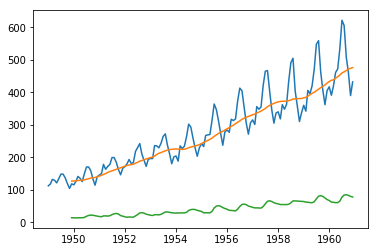

In [25]:
# Create a function to check for the stationarity of a given timeseries using rolling stats and DF test
# Collect and package the code from previous lab
rollmean = ts.rolling(window=12, center = False).mean()
rollstd = ts.rolling(window=12, center = False).std()
plt.plot(ts)
plt.plot(rollmean)
plt.plot(rollstd)
adfuller(ts)


Use your newly created function on the airpassenger data set.

In [3]:
# Code here

## Perform a log() and sqrt() transform

In [26]:
# Log transform timeseries and compare with original to check the effect
ts['log']= np.log(ts)
ts['sqrt'] = ts**.5

ValueError: Wrong number of items passed 2, placement implies 1

moving forward, let's keep working with the log transformed data before subtracting rolling mean, differencing, etc.

## Subtracting the rolling mean

Create a rolling mean using your log transformed time series, with a time window of 7. Plot the log-transformed time series and the rolling mean together.

In [5]:
# your code here

Now, subtract the rolling mean from the time series, look at the 10 first elements of the result and plot the result.

In [6]:
# Subtract the moving average from the original data and check head for Nans

In [7]:
# Drop the NaN values from timeseries calculated above


In [8]:
# Plot the result


Finally, use your function `check_stationarity` to see if this series is considered stationary!

In [9]:
# Your code here

### Based on the visuals and on the Dickey-Fuller test, what do you conclude?


## Subtracting the weighted rolling mean

Repeat all the above for the *weighter* rolling mean. Start from the log-transformed data again. Compare the Dickey-Fuller Test results. What do you conclude?

In [10]:
# Use Pandas ewma() to calculate Weighted Moving Average of ts_log

# Plot the original data with exp weighted average


In [11]:
# Subtract the moving average from the original data and plot

In [12]:
# do a stationarity check

### Based on the visuals and on the Dickey-Fuller test, what do you conclude?


## Differencing

Using exponentially weighted moving averages, we seem to have removed the upward trend, but not the seasonality issue. Now use differencing to remove seasonality. Make sure you use the right amount of `periods`. Start from the log-transformed, exponentially weighted rolling mean-subtracted series.

After you differenced the series, run the `stationarity check` again.

In [13]:
# difference your data and look at the head

In [14]:
# plot your differenced time series

In [15]:
# drop nas

In [16]:
# perform the stationarity check

### Your conclusion

## Summary 

In this lab, you learned how to make time series stationary through using log transforms, rolling means and differencing.